In this notebook, i load vibration data from csv file and i create a set of spectogram images in the selected folder.

This notebook is parametric respect csv file loaded.

Last output showed below is referred at Test dataset

In [2]:
from scipy import signal
from scipy.fft import fftshift

import numpy as np
import pandas as pd

import time
import os

import matplotlib
#matplotlib.use('Agg')   # For prevent memory leak, if it occur
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Setting


In [4]:
# Get the file path to the directory that contains the file you want to read.

name_csv_file = 'all_test_faults.csv'

csv_file_path = os.path.join('/content/drive/MyDrive/TESI/Csv_file', name_csv_file)
images_file_path = r'/content/drive/MyDrive/TESI/Spectogram_images'

In [5]:
# Global Parameters

win_len=1024
stride=win_len//4
Fs=48000

In [6]:
# Params for create images

params = {}

params['pixel_dimension'] = 180
params['dpi'] = 100
params['pixel_error1'] = 139
params['pixel_error2'] = 138

print(params)

{'pixel_dimension': 180, 'dpi': 100, 'pixel_error1': 139, 'pixel_error2': 138}


In [7]:
'''
Varible for define where print the spectogram images

work_localy = True  -> save temporarily on Google Colab space
            = False -> save on Google Drive
'''

work_localy = False

# Load data from csv file

In [8]:
# Load csv file

df = pd.read_csv(csv_file_path)

In [9]:
# Show data class

faults = df['fault'].unique()

count = 0
for i in faults:
  count = count +1

print(faults)
print(count)

['B007' 'B014' 'B021' 'IR007' 'IR014' 'IR021' 'Normal' 'OR007-12'
 'OR007-3' 'OR007-6' 'OR014-6' 'OR021-12' 'OR021-3' 'OR021-6']
14


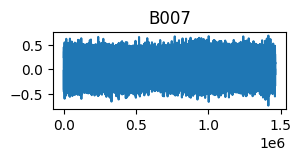

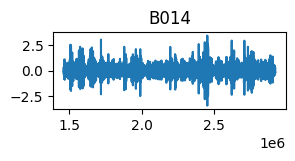

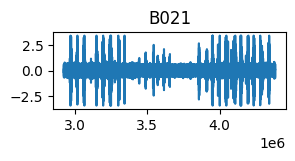

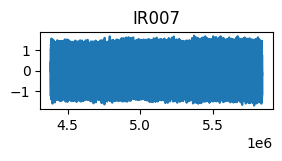

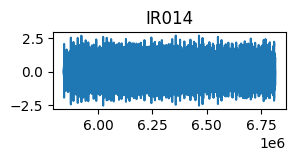

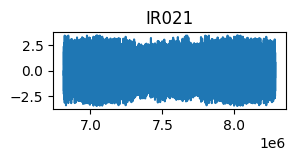

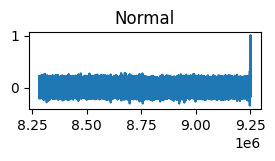

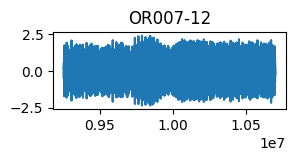

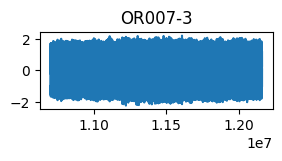

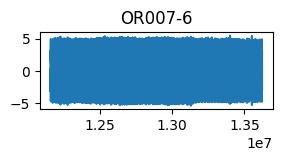

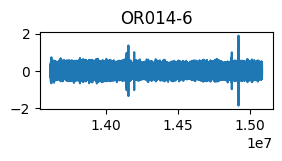

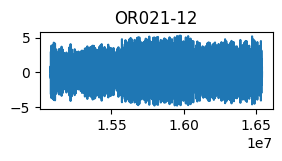

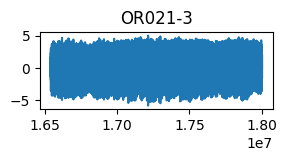

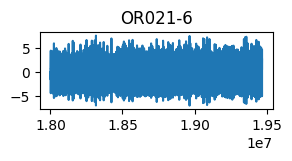

In [10]:
# Plot all faults

for  f in faults:
    plt.figure(figsize=(3,1))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

# Create one spectogram image for test

B007


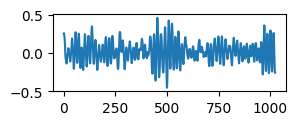

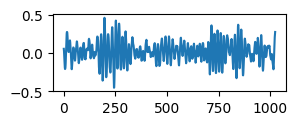

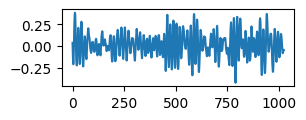

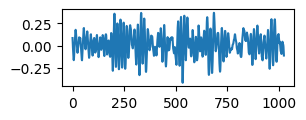

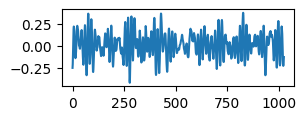

B014
B021
IR007
IR014
IR021
Normal
OR007-12
OR007-3
OR007-6
OR014-6
OR021-12
OR021-3
OR021-6


In [11]:
x=0

for k in faults:

  df_temp_2 = df[df['fault']==k]  #Contain unique data for fault
  print(k)

  for i in np.arange(0,len(df_temp_2)-(win_len),stride):
    temp = df_temp_2.iloc[i:i+win_len,:-1].values

    if x<5:

      plt.figure(figsize=(3,1))
      plt.plot(temp)
      plt.show()

    x=x+1


In [12]:
temp.shape

(1024, 1)

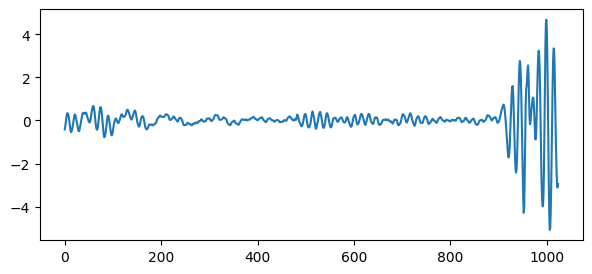

In [13]:
plt.figure(figsize=(7,3))
plt.plot(temp)
plt.show()

In [14]:
#duration = number of samples / sampling rate

duration = win_len / Fs

segment = "{:.8f}".format(1/Fs)

print('duration: ',duration)
print('segment: ', segment )

duration:  0.021333333333333333
segment:  0.00002083


In [15]:
# Compute spectogram

f, t, Sxx = signal.spectrogram(temp, fs=Fs,axis=0)

Returns:

f (ndarray) =
Array of sample frequencies.

t (ndarray) =
Array of segment times.

Sxx (ndarray) =
Spectrogram of x. By default, the last axis of Sxx corresponds to the segment times.

In [16]:
print('f : ', type(f),'/ shape: ', f.shape,'/ leght: ', len(f))
print('t : ', type(t),'/ shape: ', t.shape,'/ leght: ', len(t))
print('Sxx : ', type(Sxx),'/ shape: ', Sxx.shape)

f :  <class 'numpy.ndarray'> / shape:  (129,) / leght:  129
t :  <class 'numpy.ndarray'> / shape:  (4,) / leght:  4
Sxx :  <class 'numpy.ndarray'> / shape:  (129, 1, 4)


In [17]:
# Debug

Sxx = Sxx.squeeze(axis=1)

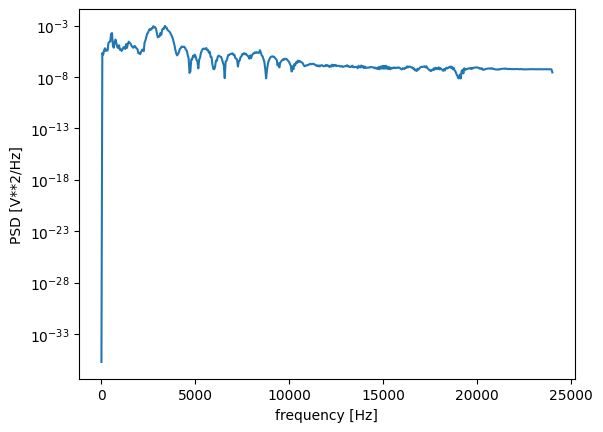

In [18]:
# Periodgram

Fper, Pxx_den = signal.periodogram(temp, Fs, axis=0)
plt.semilogy(Fper, Pxx_den)
#plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

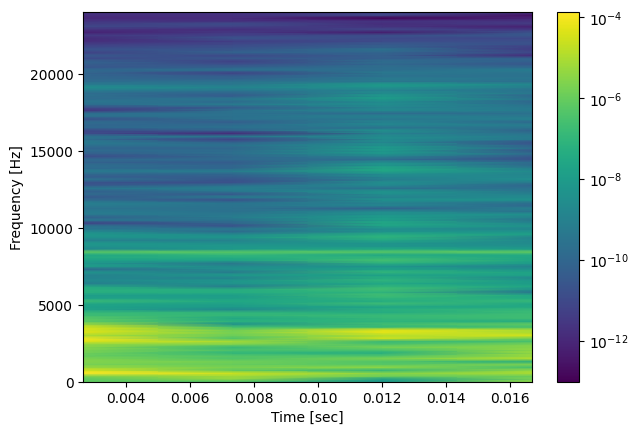

In [19]:
# Spectogram image

fig, ax = plt.subplots()

im = ax.pcolormesh(t, f, Sxx, shading='gouraud', norm = 'log')

# create an Axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.25)

# create a colorbar for the image
plt.colorbar(im, cax=cax)

ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')

plt.show()

In [20]:
# Create a csv for Matlab check

# Convert the NumPy array to a Pandas DataFrame
df_test = pd.DataFrame(temp)

# Save the DataFrame to a CSV file
df_test.to_csv("array_test_matlab.csv", index=False)

## Change pixel dimension of spectogram for fit in CNN


(138, 139, 3)


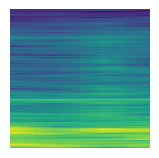

In [21]:
# Prepare Spectogram and print it #### with error scale ####

pixel_dimension = params['pixel_dimension']
dpi = params['dpi']
side = pixel_dimension / dpi

plt.figure(figsize=(side,side))
plt.axis('off')
plt.pcolormesh(t, f, Sxx, shading='gouraud', norm = 'log')

plt.savefig('pict_test.jpeg', bbox_inches='tight', pad_inches = 0)

# Load the saved image
image = plt.imread('pict_test.jpeg')

# Print the pixel dimensions of the saved image
print(image.shape)

(180, 180, 3)


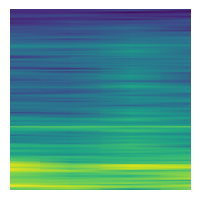

In [22]:
# Prepare Spectogram and print it #### without error scale ####

pixel_dimension = params['pixel_dimension']
dpi = params['dpi']
pixel_error1 = params['pixel_error1']
pixel_error2 = params['pixel_error2']

corrector1 = pixel_dimension/pixel_error1
corrector2 = pixel_dimension/pixel_error2

side = pixel_dimension / dpi
side1 = side*corrector1
side2 = side*corrector2

plt.figure(figsize=(side1,side2))
plt.axis('off')
plt.pcolormesh(t, f, Sxx, shading='gouraud', norm = 'log')

plt.savefig('pict_test.jpeg', bbox_inches='tight', pad_inches = 0)

# Load the saved image
image = plt.imread('pict_test.jpeg')

# Print the pixel dimensions of the saved image
print(image.shape)

# Create Images

In [23]:
def plot_spectrogram(x, fs, params, folder_path, filename, increment):
  """Plots a spectrogram of the given vibration data.

  Args:
    x: A 1D NumPy array containing the vibration data.
    fs: The sampling frequency of the audio data in Hz.
    increment: Increment number to add at filename to avoid overwritten.
    pixel_dimension: The desired width and height of the spectrogram in pixels,
                      dimension = (pixel_dimension*pixel_dimension)
  """

  # Params
  pixel_dimension = params['pixel_dimension']
  dpi = params['dpi']
  pixel_error1 = params['pixel_error1']
  pixel_error2 = params['pixel_error2']

  # Compute spectrogram
  f, t, Sxx = signal.spectrogram(x, fs=fs,axis=0)

  # Debug
  Sxx = Sxx.squeeze(axis=1)

  # Prepare spectrogram
  side = pixel_dimension / dpi

  corrector1 = pixel_dimension/pixel_error1
  corrector2 = pixel_dimension/pixel_error2
  side1 = side*corrector1
  side2 = side*corrector2

  # Create plot
  fig = plt.figure(figsize=(side1,side2))
  plt.axis('off')
  plt.pcolormesh(t, f, Sxx, shading='gouraud', norm = 'log')

  # Save plot
  concatenated_string = f"{folder_path}/{filename}_{increment}.jpeg"
  plt.savefig(concatenated_string, bbox_inches='tight', pad_inches=0)

  plt.close(fig)
  fig.clear()

In [24]:
# Check how many images i'm going to have with 1024 window

total = 0

for  f in faults:

  number_of_points = len(df[df['fault']==f].iloc[:,0])
  number_of_segments = (number_of_points - win_len) // stride + 1
  print(f'{f} has {number_of_points} number of points and plot {number_of_segments} images')

  total = total + number_of_segments

print()
print('Total images: ', total)

B007 has 1462733 number of points and plot 5710 images
B014 has 1460412 number of points and plot 5701 images
B021 has 1460992 number of points and plot 5704 images
IR007 has 1457510 number of points and plot 5690 images
IR014 has 973027 number of points and plot 3797 images
IR021 has 1467955 number of points and plot 5731 images
Normal has 969547 number of points and plot 3784 images
OR007-12 has 1450548 number of points and plot 5663 images
OR007-3 has 1456930 number of points and plot 5688 images
OR007-6 has 1461572 number of points and plot 5706 images
OR014-6 has 1459832 number of points and plot 5699 images
OR021-12 has 1459252 number of points and plot 5697 images
OR021-3 has 1461572 number of points and plot 5706 images
OR021-6 has 1466214 number of points and plot 5724 images

Total images:  76000


In [25]:
name_folder_image = str(name_csv_file)
name_folder_image = name_folder_image[:-4]
name_folder_image = name_folder_image + '_images'

print(name_folder_image)

all_test_faults_images


In [26]:
# Folder path

folder_drive_path = os.path.join(images_file_path, name_folder_image)
folder_local_path = os.path.join('/content',name_folder_image)


# Creating folders for images

if work_localy:

  # Create a local folder if doesn't exist
  if not os.path.exists(name_folder_image):
      os.makedirs(name_folder_image)
      for k in faults:
        os.makedirs(os.path.join(name_folder_image,k))
      print('new local folder created')
  else:
    print('local folder already exist')
  file_path = folder_local_path

elif not work_localy:

  # Create a drive folder if doesn't exist
  if not os.path.exists(folder_drive_path):
      os.makedirs(folder_drive_path)
      for k in faults:
        os.makedirs(os.path.join(folder_drive_path,k))
      print('new drive folder created')
  else:
    print('drive folder already exist')
  file_path = folder_drive_path


else:
  print('Folder error')

drive folder already exist


In [ ]:
# Loop for each type of Fault and print spectogram

start_time = time.time()

for fault in faults:

  count=0

  df_temp_2 = df[df['fault']==fault]  #Contain all-unique data for fault

  for i in np.arange(0,len(df_temp_2)-(win_len),stride):
    temp = df_temp_2.iloc[i:i+win_len,:-1].values

    specific_folder_path = os.path.join(file_path, fault)

    plot_spectrogram(x= temp, fs= Fs, params= params, folder_path= specific_folder_path, filename= fault, increment= count)

    count=count+1
    print(fault, count)

end_time = time.time()

In [ ]:
execution_time = end_time - start_time
minute_time = execution_time//60

print(f'Execution time: \n - {execution_time:.2f} seconds \n - {minute_time} minutes')

Images creation time for 0 Load images:
- CPU: 40 m  

Images creation time for 1-2-3 Load images:
- CPU: 192 m